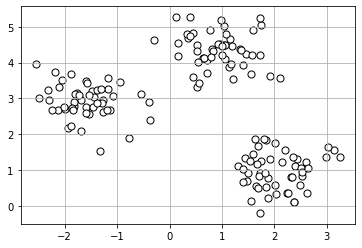

In [2]:
#K-mean clustering using a two-dimensional dataset
# Creating a dataset that is well defined into three clusters

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0],
           X[:,1],
           c = 'white',
           marker = 'o',
           edgecolor = 'black',
           s = 50)

plt.grid()
plt.show()

In [3]:
# Applying K-means clustering

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
           init='random',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

y_km = km.fit_predict(X)

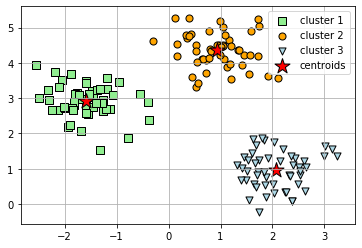

In [5]:
#Plotting the clusters

plt.scatter(X[y_km == 0, 0],
           X[y_km == 0, 1],
           s = 50, c = 'lightgreen',
           marker = 's', edgecolor = 'black',
           label = 'cluster 1')
plt.scatter(X[y_km == 1, 0],
           X[y_km == 1, 1],
           s = 50, c = 'orange',
           marker = 'o', edgecolor = 'black',
           label = 'cluster 2')
plt.scatter(X[y_km == 2, 0],
           X[y_km == 2, 1],
           s = 50, c = 'lightblue',
           marker = 'v', edgecolor = 'black',
           label = 'cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
           km.cluster_centers_[:, 1],
           s = 250, marker = '*',
           c = 'red', edgecolor = 'black',
           label = 'centroids')
plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

In [ ]:
#Using k-means++ - places initial centroids far away from each other
# improvement over traditional K-means which uses a random seed to place the centroid

#The only difference with the implimentation is using the default init = 'k-means++'

In [6]:
#Quantifying the quality of the clusters - within-cluster SSE (distortion)
# SSE is accessible via the inertia_ attribute

print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


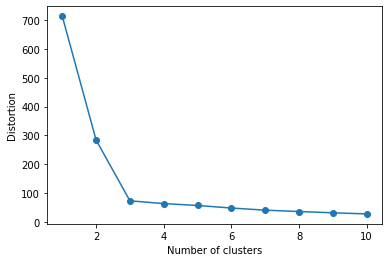

In [8]:
#Use an elbow method to try to find the best number k - uses SSE - same as scree plot

distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i,
               init = 'k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

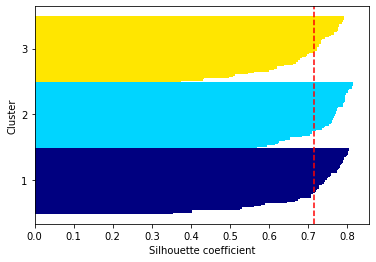

In [9]:
#Silhouette analysis can also be used to measure the quality of clustering
# Measure of how tightly groups the samples in the cluster are
# The ideal silhouette is 1 - the cluster separation (b^i) quantifies how dissimilar
# a sample is to other clusters, and a^i tells us how similar it is to other samples in
# its own cluster

km = KMeans(n_clusters=3,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol = 1e-04,
           random_state=0)

y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km,
                                    metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = 'none',
            color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg,
           color = 'red',
           linestyle = '--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

#The below is a silhouette plot for "good" clustering
# none of the clusters are close to 0 and the average is pretty high >.7

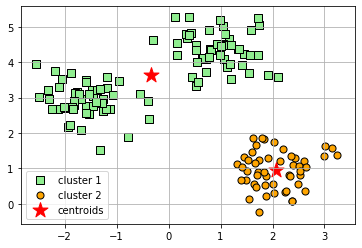

In [11]:
# Seeding k-means algorithm with only two centroids
# doing this to show "bad" clustering

km = KMeans(n_clusters=2,
           init = 'k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
           X[y_km == 0, 1],
           s = 50, c = 'lightgreen',
           marker = 's', edgecolor = 'black',
           label = 'cluster 1')
plt.scatter(X[y_km == 1, 0],
           X[y_km == 1, 1],
           s = 50, c = 'orange',
           marker = 'o', edgecolor = 'black',
           label = 'cluster 2')
plt.scatter(km.cluster_centers_[:, 0],
           km.cluster_centers_[:, 1],
           s = 250,
           marker = '*',
           c = 'red',
           label = 'centroids')
plt.legend(loc = 'lower left')
plt.grid()
plt.show()

#One of the centroids is between two clusters - this is obviously suboptimal

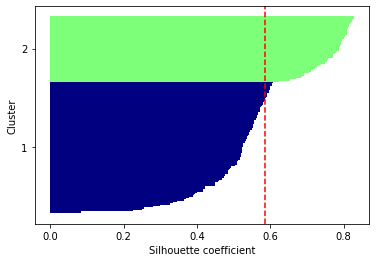

In [12]:
#Silhouette plot of the above clusters

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,
                                    y_km,
                                    metric = 'euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = 'none',
            color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg,
           color = 'red',
           linestyle = '--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

#The resulting plot shows clusters with very different lengths and widths
# this suggests suboptimal clustering

In [13]:
#Hierarchical clustering

#Using agglomerative clustering using complete linkage 
# agglomerative starts with each point as a singleton cluster
# merge the two closest clusters based on the distance between the most dissimilar (distant) members 
# repeat

#Generating random sample data

import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3]) * 10

df = pd.DataFrame(X, columns = variables, index = labels)
df

/Users/santiagocassalett/anaconda3/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [17]:
#Calculating the distance matrix using pdist function

from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(
                        pdist(df, metric = 'euclidean')),
                       columns = labels, index = labels)

row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [18]:
#The above approach is wrong - you should not use the squareform for 
# complete linkeage algorithm

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(df.values,
                      method = 'complete',
                      metric = 'euclidean')

pd.DataFrame(row_clusters,
            columns = ['row label 1',
                      'row label 2',
                      'distance',
                      'no. of items in clust.'],
            index = ['cluster %d' % (i+1) for i in
                    range(row_clusters.shape[0])])

#Below shows in columns 1 and 2 the most dissimilar members in each cluster,
# column 3 shows the distance, and column 4 shows the number of members in each cluster

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


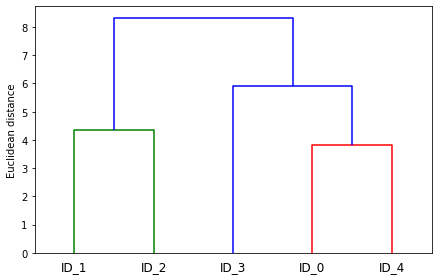

In [19]:
#We can now visualize the clusters in a dendrogram

from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters,
                      labels = labels)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

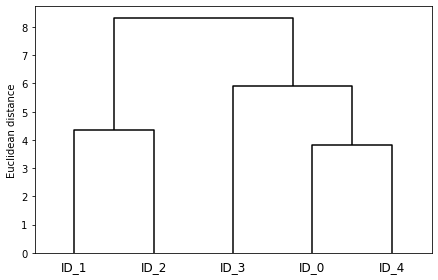

In [20]:
#Same as the above but all black

from scipy.cluster.hierarchy import dendrogram, set_link_color_palette

set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters,
                      labels = labels,
                      color_threshold=np.inf)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

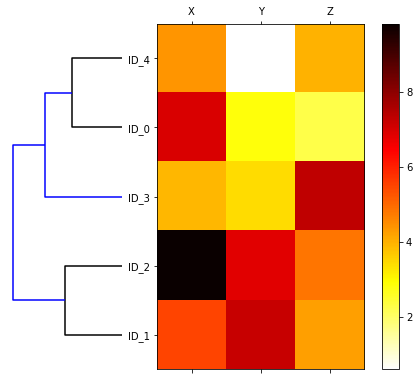

In [21]:
# Combining dendrogram with heatmap to represent the individual values
# in the sample matrix with a color code

#This creates a new figure object
fig = plt.figure(figsize = (8, 8), facecolor = 'white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')

#Reordering the data according to the clustering labels
# accessible via the dendrogram object and leaves key

df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

#Construct the heatmap and place next to dendrogram
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust,
                 interpolation = 'nearest',
                 cmap = 'hot_r')

#Modify the dendrogram by removing axis ticks and hiding the axis spine
# add color bar and assign the feature and sample names

axd.set_xticks([])
axd.set_yticks([])

for i in axd.spines.values():
    i.set_visible(False)
    
fig.colorbar(cax)

axm.set_xticklabels(['']+list(df_rowclust.columns))
axm.set_yticklabels(['']+list(df_rowclust.index))
plt.show()


#The order of the rows reflects the clustering
# color-coding of each sample

In [22]:
#We can also impliment hierarchical clustering using scikit-learn
# with this we can specify the number of clusters we want returned
# useful for pruning the hierarchical cluster tree

from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3,
                            affinity='euclidean',
                            linkage='complete')

labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

#Can see the the 0st and 4th sample were into cluster 1,
# 1st and 2nd into cluster 0, and 3rd alone in cluster 2
# ID_3 is more closely related to ID_0 and ID_4 than 
# ID_2 and ID_1 which is clear from dendrogram
# not clear from sklearn

Cluster labels: [1 0 0 2 1]


In [23]:
#rerunning the above with only 2 clusters as the output

from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                            affinity='euclidean',
                            linkage='complete')

labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

#This 'pruned' clustering hierarchy - ID_3 was clustered with 0 and 4 as expected

Cluster labels: [0 1 1 0 0]


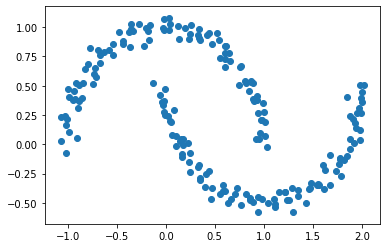

In [24]:
#Density-based Spatial Clustering of Applications with Noise (DBSCAN)
# doesnt assume spherical clustering and does not require manual cut-off points
# assigns cluster labels based on dense regions of points

#Core points with a radius (E) and borderpoints within the radius, and noise outside the radius

#Creating a new half-moon shaped dataset to compare the methods

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200,
                 noise=0.05,
                 random_state=0)

plt.scatter(X[:,0], X[:, 1])
plt.show()

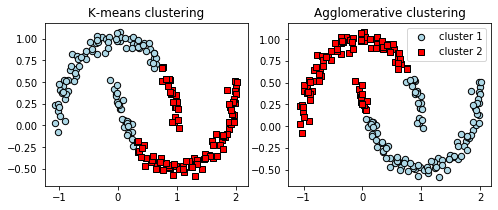

In [26]:
#Testing whether k-means or complete linkeage can successfully ID the clusters

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 3))

#K-means
km = KMeans(n_clusters=2,
           random_state=0)

y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0],
           X[y_km == 0, 1],
           s = 40, c = 'lightblue',
           marker = 'o', edgecolor = 'black',
           label = 'cluster 1')
ax1.scatter(X[y_km == 1, 0],
           X[y_km == 1, 1],
           s = 40, c = 'red',
           marker = 's', edgecolor = 'black',
           label = 'cluster 2')
ax1.set_title('K-means clustering')

#Agglomerative 
ac = AgglomerativeClustering(n_clusters=2,
                            affinity='euclidean',
                            linkage='complete')

y_ac = ac.fit_predict(X)

ax2.scatter(X[y_ac == 0, 0],
           X[y_ac == 0, 1],
           s = 40, c = 'lightblue',
           marker = 'o', edgecolor = 'black',
           label = 'cluster 1')
ax2.scatter(X[y_ac == 1, 0],
           X[y_ac == 1, 1],
           s = 40, c = 'red',
           marker = 's', edgecolor = 'black',
           label = 'cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

#Neither method was able to separate the clusters

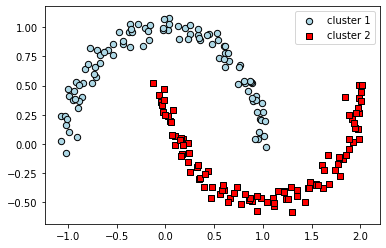

In [29]:
#Now with the DBSCAN approach

from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.2,
           min_samples=5,
           metric='euclidean')

y_db = db.fit_predict(X)

plt.scatter(X[y_db == 0, 0],
           X[y_db == 0, 1],
           s = 40, c = 'lightblue',
           marker = 'o', edgecolor = 'black',
           label = 'cluster 1')
plt.scatter(X[y_db == 1, 0],
           X[y_db == 1, 1],
           s = 40, c = 'red',
           marker = 's', edgecolor = 'black',
           label = 'cluster 2')

plt.legend()
plt.show()

#This one can separate - strength of DBSCAN is clustering of random shapes